In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import os

In [2]:
data = pd.read_csv("Volumetric_features.csv")
data.info()
data.head()

X = data.drop(["Age"], axis=1) 
y = data.Age.values

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)
data.drop('dataset', axis=1, inplace = True)
data.drop('Left-WM-hypointensities', axis=1, inplace = True)
data.drop('Right-WM-hypointensities', axis=1, inplace = True)
data.drop('Left-non-WM-hypointensities', axis=1, inplace = True)
data.drop('Right-non-WM-hypointensities', axis=1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB


In [3]:
#kNN
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train, y_train)
y_predict = neigh.predict(x_test)

0.7161638355652613
10.657105048399321


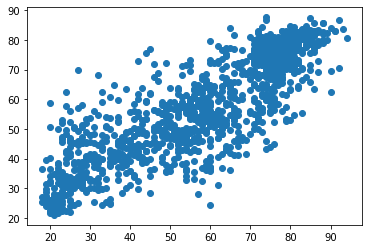

In [4]:
r2 = sk.metrics.r2_score(y_test, y_predict)
rmse = np.sqrt(sk.metrics.mean_squared_error(y_test, y_predict))
print (r2)
print (rmse)
plt.scatter(y_test, y_predict)

In [5]:
#CART
from sklearn import tree

clf = tree.DecisionTreeRegressor(min_samples_split=100)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

0.7896800701740117
9.173722441774952


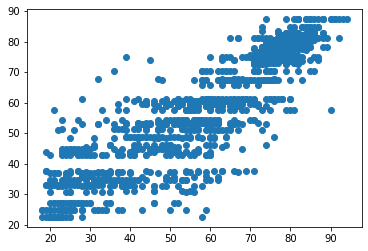

In [6]:
r2 = sk.metrics.r2_score(y_test, y_predict)
rmse = np.sqrt(sk.metrics.mean_squared_error(y_test, y_predict))
print (r2)
print (rmse)
plt.scatter(y_test, y_predict)

In [7]:
#Bagged
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


0.8600363751831437
7.483641465884463


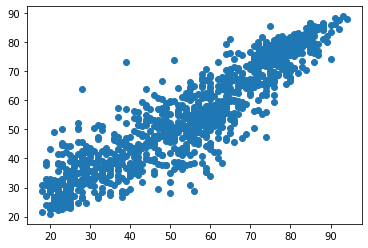

In [8]:
r2 = sk.metrics.r2_score(y_test, y_predict)
rmse = np.sqrt(sk.metrics.mean_squared_error(y_test, y_predict))
print (r2)
print (rmse)
plt.scatter(y_test, y_predict)